# Lab 4

Navka Hlib, IPS-41

In [5]:
student_index = 12
variant_count = 10
variant_index = student_index % variant_count

variant_index

2

$$
\begin{cases}
6.2x_1 + 6.6x_2 = 83 \\
-9.6x_1 + 13.8x_2 = 72 \\
-13.2x_1 + 5.7x_2 = 305
\end{cases}
$$

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [108]:
def get_function(coefficient1, coefficient2, constant_term, x1):
    return (constant_term - coefficient1 * x1) / coefficient2


coefficients = [
    [6.2, 6.6],
    [-9.6, 13.8],
    [-13.2, 5.7]
]

constant_terms = [83, 72, 305]

plot_titles = [
    "$ f0: 6.2x1 + 6.6x2 = 83 $",
    "$ f1: -9.6x1 + 13.8x2 = 72 $",
    "$ f2: -13.2x1 + 5.7x2 = 305 $"
]

plot_styles = ["--r", ":g", "-.m"]

plot_x_range = (-40, 15)
plot_y_range = (-30, 35)

x1 = np.linspace(plot_x_range[0], plot_x_range[1], num=1000)

functions = [get_function(coefficients[0], coefficients[1], constant_term, x1) for coefficients, constant_term in zip(coefficients, constant_terms)]


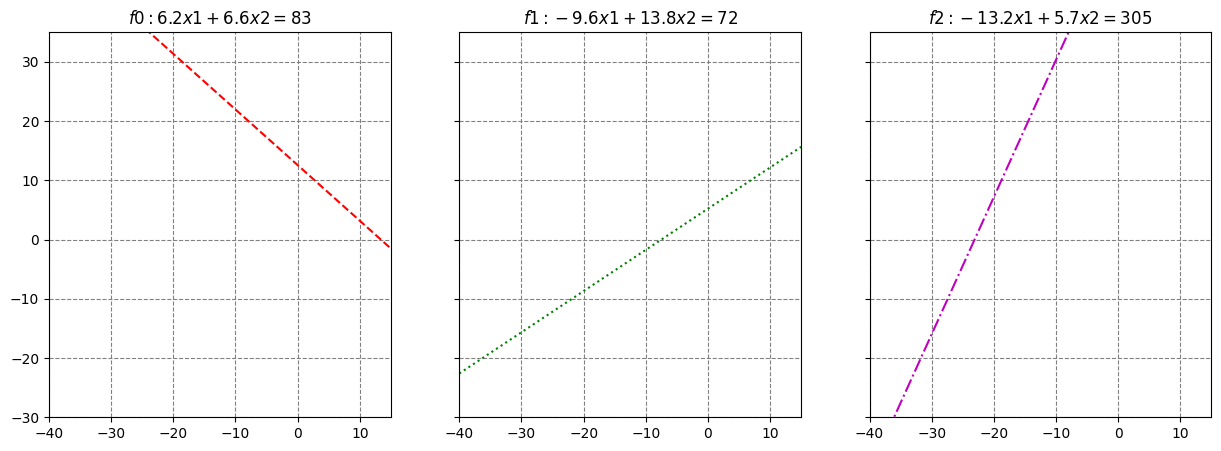

In [110]:

_, axes = plt.subplots(ncols=3, figsize=(15, 5))

for i, axis in enumerate(axes):
    if i != 0:
        axis.set_yticklabels([])

    axis.set(xlim=plot_x_range, ylim=plot_y_range, title=plot_titles[i])
    axis.grid(linestyle="--", color="grey")
    
    axis.plot(x1, functions[i], plot_styles[i])

plt.savefig("equations.png")
plt.savefig("equations.jpg")
plt.savefig("equations.svg")

plt.show()

In [121]:
function_coefficients = [
    np.array([coefficients[0], coefficients[1]]),
    np.array([coefficients[1], coefficients[2]]),
    np.array([coefficients[0], coefficients[2]]),
]

function_constant_terms = [
    np.array([constant_terms[0], constant_terms[1]]),
    np.array([constant_terms[1], constant_terms[2]]),
    np.array([constant_terms[0], constant_terms[2]]),
]

intersection_points = [np.linalg.solve(a, b) for a, b in zip(function_coefficients, function_constant_terms)]

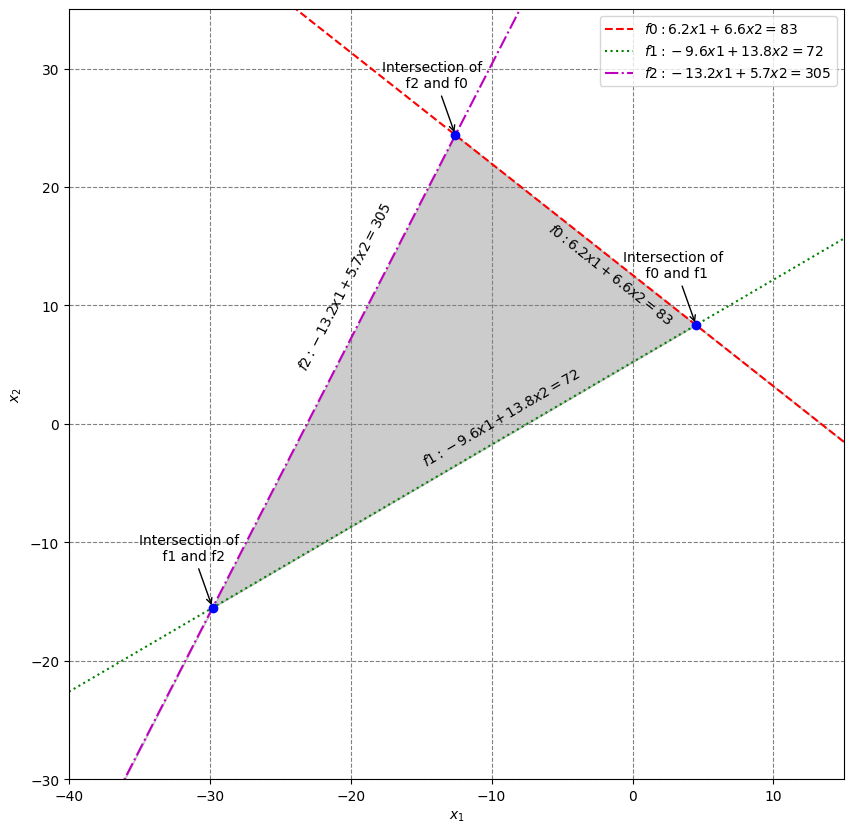

In [139]:
_, axes = plt.subplots(figsize=(10, 10))

axes.set(xlim=plot_x_range, ylim=plot_y_range, xlabel='$x_1$', ylabel='$x_2$')
axes.grid(linestyle='--', color='grey')

y1 = np.minimum(functions[0], functions[2])
y2 = np.minimum(functions[1], y1)

plt.fill_between(x1, y1, y2, color='grey', alpha=0.4)

for i, function in enumerate(functions):
    axes.plot(x1, function, plot_styles[i], label=plot_titles[i])

for i, intersection_point in enumerate(intersection_points):
    point_text_position = [intersection_point[0], intersection_point[1]]
    point_text_position[0] -= 1.5
    point_text_position[1] += 4

    function_text_position = np.median([intersection_point, intersection_points[(i - 1) % len(intersection_points)]], axis=0)
    function_text_position[0] -= 2

    axes.plot(*intersection_point, marker='o', color='b')
    axes.text(function_text_position[0], function_text_position[1], plot_titles[i], rotation=np.rad2deg(np.arctan(-coefficients[i][0] / coefficients[i][1])), rotation_mode="anchor", transform_rotates_text=True)
    axes.annotate(f"Intersection of \n f{i} and f{(i + 1) % 3}", xy=intersection_point, xytext=point_text_position, ha="center", arrowprops=dict(arrowstyle="->"))

axes.legend()

plt.savefig("intersection.png")
plt.savefig("intersection.jpg")
plt.savefig("intersection.svg")
plt.show()